# Last but not least


Today, we are coding this from scratch :

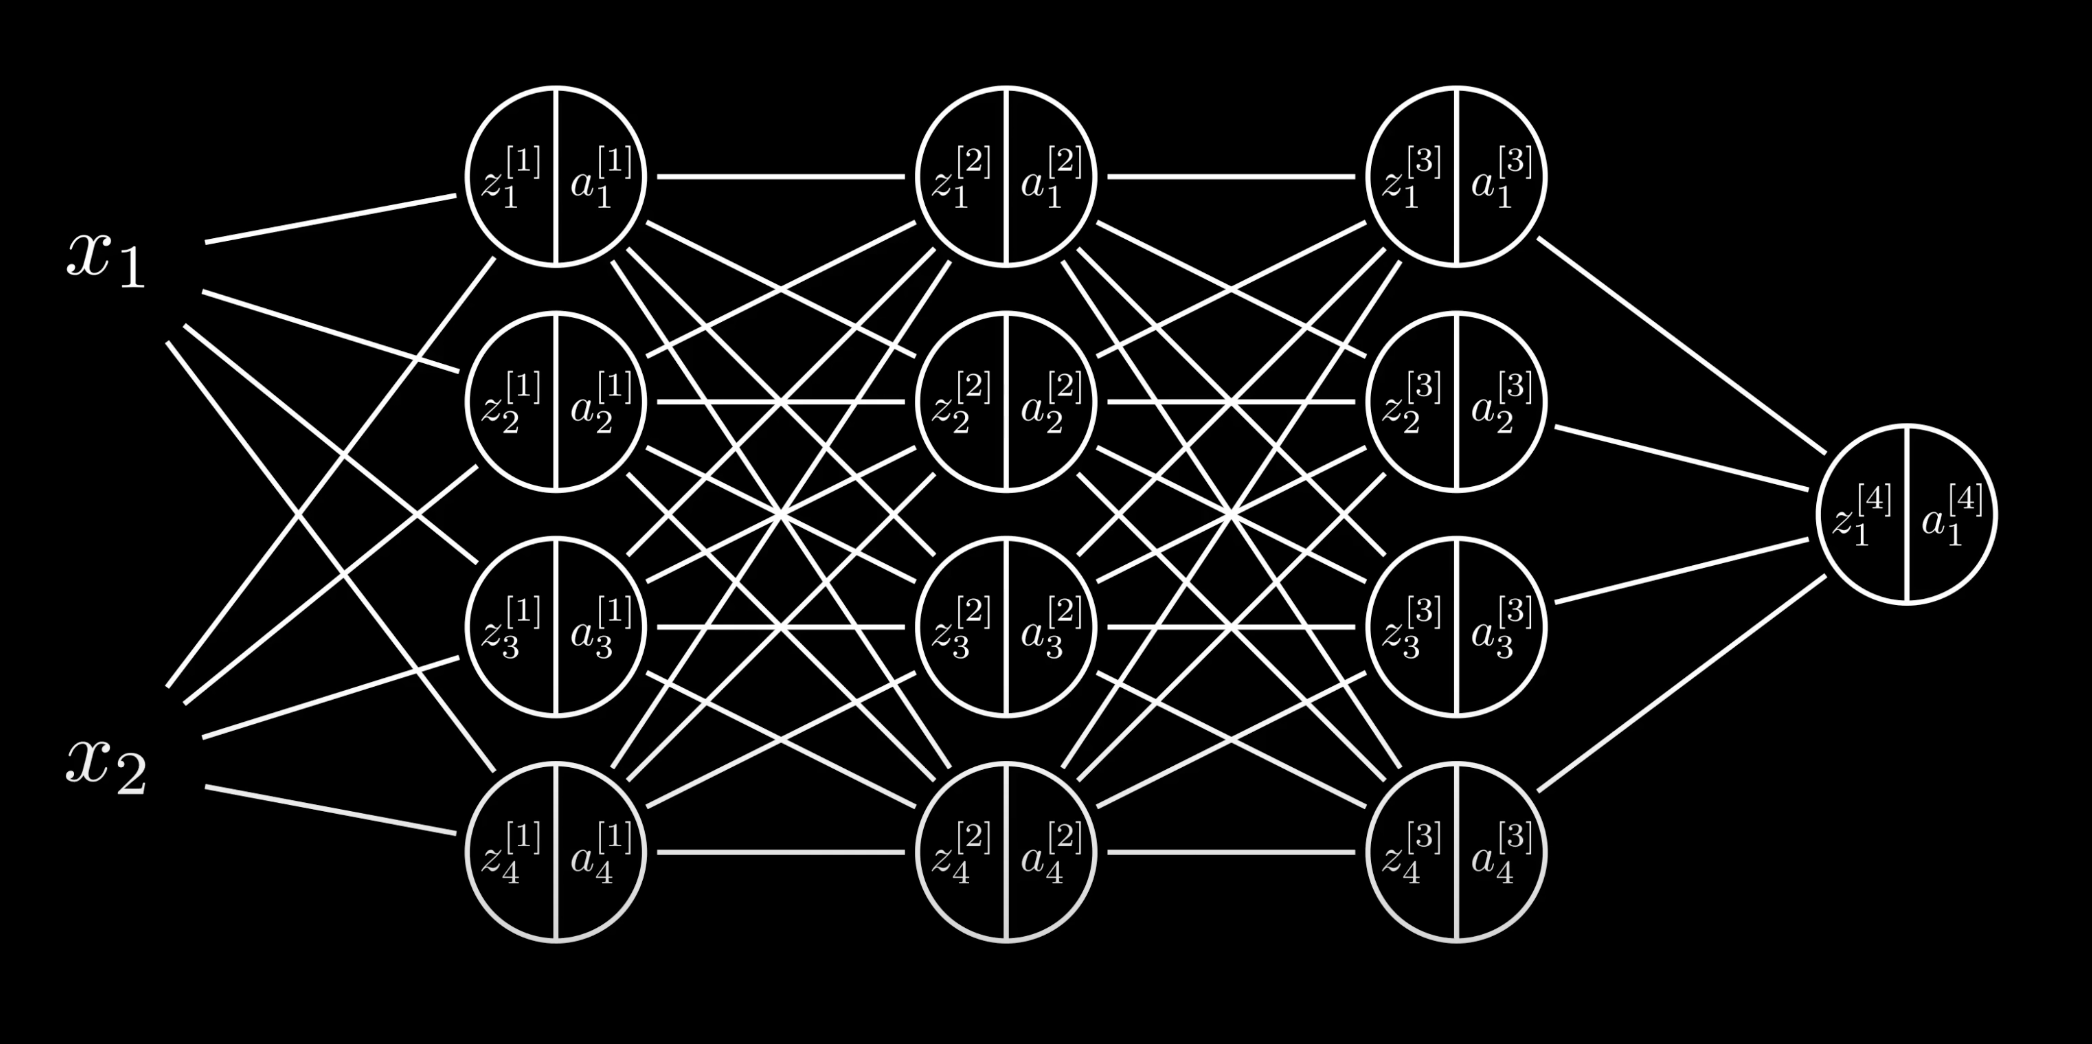

In [1]:
from IPython.display import Image, display

display(Image("/Users/pierrechambet/Desktop/photos_git/graph_7.png", width=600, height=300))

More precisely, we are coding to code this :

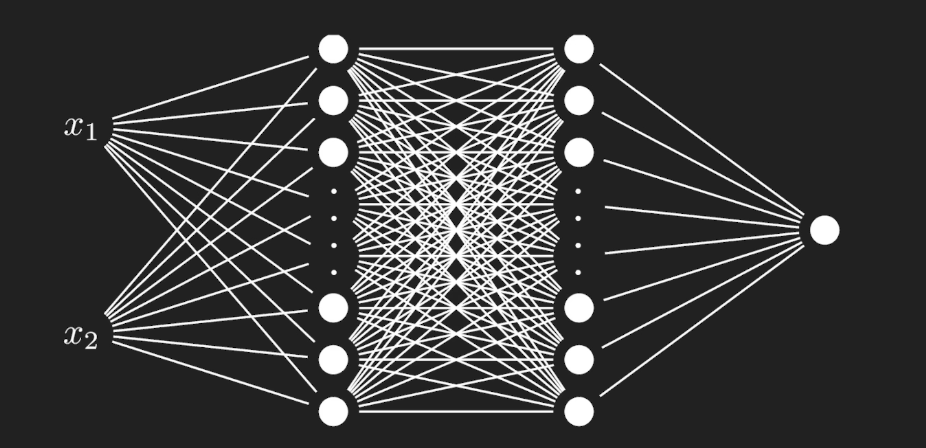

In [2]:
from IPython.display import Image, display

display(Image("/Users/pierrechambet/Desktop/photos_git/graph_8.png", width=600, height=300))

With as many layers and neurons as we want.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tqdm import tqdm

## Initialization

In [4]:
def initialisation(dimensions):
    # Create a dictionary to store the weights (W) and biases (b)
    parameters = {}

    # Total number of layers (input + hidden + output)
    L = len(dimensions)

    # Loop through each layer starting from 1 (layer 0 is the input layer)
    for l in range(1, L):
        # Initialize weights with random values: shape (neurons in current layer, neurons in previous layer)
        parameters[f'W{l}'] = np.random.randn(dimensions[l], dimensions[l-1])

        # Initialize biases with random values: shape (neurons in current layer, 1)
        parameters[f'b{l}'] = np.random.randn(dimensions[l], 1)

    # Return the dictionary containing all parameters
    return parameters


In [5]:
# Defines the network architecture
dimensions = [2, 32, 32, 1] 

# Initializes weights and biases
parameters = initialisation(dimensions)  

# Prints the shape of each weight and bias matrix
for key, value in parameters.items():
    print(key, value.shape)

W1 (32, 2)
b1 (32, 1)
W2 (32, 32)
b2 (32, 1)
W3 (1, 32)
b3 (1, 1)


Here you are, you just build the same neural network as shown in the picture above.

Now we have to give this neural network a purpose, a consciousness, a goal.

## Forward propagation

Remember the forward propagation we did in the previous notebook ?

There were one thing very important to remember.

The first layer (input layer) takes as input the data. But the second layer (hidden layer) takes as input the output of the first layer.

We are going to generalize that. In fact, we are going to say that the i-th hidden layer takes as input the output of the (i-1)-th hidden layer, from the first layer (input layer) to the last layer (output layer).

In [6]:
from sklearn.datasets import make_blobs, make_circles

X shape: (2, 100)
y shape: (1, 100)


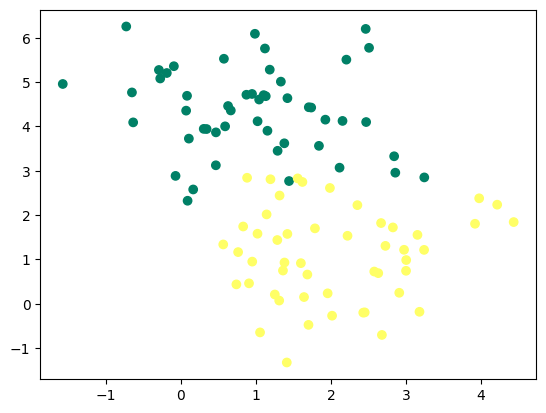

In [7]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

# Create a scatter plot of the data
print('X shape:', X.shape)
print('y shape:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

In [8]:
def forward_propagation(X, parameters):
    activations = {}

    # Total number of layers (each has a W and b, so divide by 2)
    L = len(parameters) // 2

    # Transpose the input matrix so that each column represents one example
    A = X

    # Store the input layer activation (A0)
    activations['A0'] = A

    # Loop through all layers to compute activations
    for l in range(1, L + 1):
        # Get weights and biases for the current layer
        W = parameters[f'W{l}']
        b = parameters[f'b{l}']

        # Layer computation
        Z = np.dot(W, A) + b

        # Activation using sigmoid function
        A = 1 / (1 + np.exp(-Z))

        # Save the current layer's activation in the dictionary
        activations[f'A{l}'] = A

    # Return all computed activations
    return activations


The `forward_propagation` function generalizes activation computation in a multi-layer neural network. Each layer takes the activation from the previous layer $A^{[i-1]}$, applies a linear transformation $Z^{[i]} = W^{[i]} A^{[i-1]} + b^{[i]}$, and passes it through a sigmoid activation to obtain $A^{[i]}$. This process repeats for all layers, linking them in a chain-like structure. It enables information to flow from the input to the output, while each layer progressively extracts higher-level features from the data. This modular, differentiable architecture is essential for learning complex functions through gradient-based optimization.


In [9]:
activations = forward_propagation(X, parameters)
for key, value in activations.items():
    print(key, value.shape)

A0 (2, 100)
A1 (32, 100)
A2 (32, 100)
A3 (1, 100)


## General Backpropagation Equations for Any Layer `l`

### Forward Prop
For a layer `l`, the forward pass computes:
- $Z_l = W_l \cdot A_{l-1} + b_l$
- $A_l = \sigma(Z_l)$, where $\sigma$ is the sigmoid activation function

---

### Backpropagation

Remember, in the backpropagation process, we work from the output layer to the input layer.
Now take the time to understand the following question.

**How do we generalize the backpropagation equations for any layer `l`?**

We found those equations in the previous notebook for a two-layer neural network :
$$
\left[
\begin{aligned}
\mathbf{\frac{\partial \mathcal{L}}{\partial W_2}} &= \mathbf{\frac{1}{m} (A_2 - y) \cdot A_1} \\
\mathbf{\frac{\partial \mathcal{L}}{\partial b_2}} &= \mathbf{\frac{1}{m} \sum_m{(A_2 - y)}} \\
\mathbf{\frac{\partial \mathcal{L}}{\partial W_1}} &= \mathbf{\frac{1}{m} dZ_1 \cdot X} \\
\mathbf{\frac{\partial \mathcal{L}}{\partial b_1}} &= \mathbf{\frac{1}{m} \sum_m{dZ_1}}
\end{aligned}
\right]
$$
With the terms:
$$
\left[
\begin{aligned}
\mathbf{dZ_2} &= \mathbf{A_2 - y} \\
\mathbf{dZ_1} &= \mathbf{dZ_2 \cdot W_2 \cdot A_1 \cdot (1 - A_1)}
\end{aligned}
\right]
$$

Taking a closer look at the equations, we can see that the gradient computation for every hidden layer uses the activation of the previous layer. That we can generalize to any layer `l` as follows:

For every layer `l`, we have:
$$
\left[
\begin{aligned}
\mathbf{\frac{\partial \mathcal{L}}{\partial W_l}} &= \mathbf{\frac{1}{m} dZ_l \cdot A_{l-1}} \\
\mathbf{\frac{\partial \mathcal{L}}{\partial b_l}} &= \mathbf{\frac{1}{m} \sum_m{dZ_l}}
\end{aligned}
\right]
$$
with the terms:
$$
\left[
\begin{aligned}
\mathbf{dZ_{L}} &= \mathbf{A_L - Y} \\
\mathbf{dZ_l} &= \mathbf{dZ_{l+1} \cdot W_{l+1} \cdot A_l \cdot (1 - A_l)}
\end{aligned}
\right]
$$


#### How do we process

In the backpropagation process, we work from the output layer to the input layer. So let's compute the gradients for the last layer `L` and then for all the hidden layers `l < L`.

#### In any case, the gradients are computed the same way, for any layer `l =< L`:
- $\frac{\partial \mathcal{L}}{\partial W_l} = \frac{1}{m} \cdot dZ_l \cdot A_{l-1}^T$
- $\frac{\partial \mathcal{L}}{\partial b_l} = \frac{1}{m} \cdot \sum_{i=1}^m dZ_l^{(i)}$

#### 1. BUT for the Output Layer `L` :
- $dZ_L = A_L - Y$

#### 2. For all the other layers `l < L`:

- $dZ_l = (W_{l+1}^T \cdot dZ_{l+1}) \circ (A_l \circ (1 - A_l))$



Where:
- $m$ is the number of examples
- $A_{l-1}$ is the activation from the previous layer
- $dZ_l$ is the error term at layer `l`

---

### Summary

Backpropagation works by:
1. Computing the output error $dZ_L$
2. Propagating it backward through the network using weights and sigmoid derivative
3. Computing gradients $\frac{\partial \mathcal{L}}{\partial W_l}$ and $\frac{\partial \mathcal{L}}{\partial b_l}$ for all layers
4. Using these gradients to update weights and biases via gradient descent



Take all the equations above to compare with the code below, and understand how we can code the generalize the backpropagation process for any layer `l` in a neural network.

In [10]:
def back_propagation(y, parameters, activations):
    # Number of examples
    m = y.shape[1]

    # Number of layers
    L = len(parameters) // 2

    # Initialize dZ for the output layer: dZ = A_L - y
    # Be careful with the shapes
    #print('y shape:', y.shape)
    #print('A_L shape:', activations[f'A{L}'].shape)

    dZ = activations[f'A{L}'] - y

    # Dictionary to store gradients
    gradients = {}

    # Loop backward through the layers
    for l in reversed(range(1, L + 1)):
        # Compute gradients for weights and biases
        gradients[f'dW{l}'] = 1/m * np.dot(dZ, activations[f'A{l-1}'].T)
        gradients[f'db{l}'] = 1/m * np.sum(dZ, axis=1, keepdims=True)

        # If not the first layer, compute dZ for the previous layer
        if l > 1:
            dA_prev = np.dot(parameters[f'W{l}'].T, dZ)
            A_prev = activations[f'A{l-1}']
            dZ = dA_prev * A_prev * (1 - A_prev)  # derivative of sigmoid

    return gradients

In [11]:
# Compute gradients using backpropagation
gradients = back_propagation(y, parameters, activations)
for key, value in gradients.items():
    print(key, value.shape)

dW3 (1, 32)
db3 (1, 1)
dW2 (32, 32)
db2 (32, 1)
dW1 (32, 2)
db1 (32, 1)


Now that we have the gradients, we can update the parameters of the neural network :

In [12]:
def update(gradients, parameters, learning_rate):
    L = len(parameters) // 2
    for l in range(1, L):
        parameters[f'W{l}'] = parameters[f'W{l}'] - learning_rate * gradients[f'dW{l}']
        parameters[f'b{l}'] = parameters[f'b{l}'] - learning_rate * gradients[f'db{l}']

    return parameters

In [13]:
parameters = update(gradients, parameters, learning_rate=0.1)

Let's quickly code the prediction function, to check if our neural network is able to predict the right label for a given input.

In [14]:
def predict(X, parameters):
    L = len(parameters) // 2
    activations = forward_propagation(X, parameters)
    A = activations[f'A{L}']
    #)
    return A >= 0.5

In [15]:
A = predict(X, parameters)

We have everything to build the `neural network` function.

## Final Neural Network Code

In [16]:
from sklearn.metrics import log_loss, accuracy_score

In [17]:
def neural_network(X, y, dimensions, learning_rate, epoch):

    parameters = initialisation(dimensions)

    train_loss = []
    train_acc = []

    for i in range(epoch):
        L = len(parameters) // 2
        activations = forward_propagation(X, parameters)
        # compare the output data: the last activation, to the ground truth y
        train_loss.append(log_loss(y.flatten(), activations[f'A{L}'].flatten()))
        train_acc.append(accuracy_score(y.flatten(), predict(X, parameters).flatten()))
        gradients = back_propagation(y, parameters, activations)
        parameters = update(gradients, parameters, learning_rate)

    # Ploting the curves
    # - learning curve (loss) and accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.title('Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    return parameters

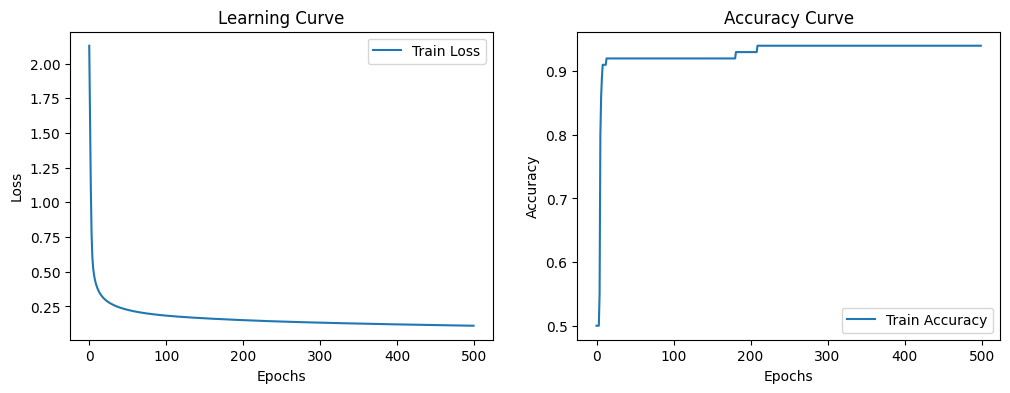

In [18]:
parameters = neural_network(X, y, [2, 64, 64, 1] , learning_rate=0.1, epoch=500)

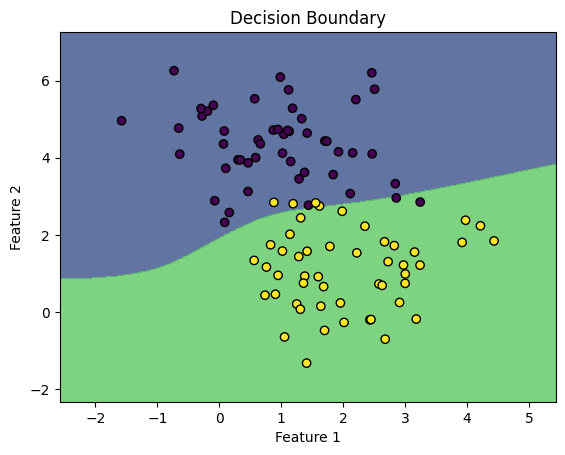

In [19]:
def decision_boundary(X, y, parameters):
    if X.shape[0] == 2:
        X_plot = X.T
    else:
        X_plot = X

    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    grid = np.c_[xx.ravel(), yy.ravel()]       # shape (n_points, 2)
    Z = predict(grid.T, parameters)            # shape (1, n_points)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y.flatten(), edgecolors='k', marker='o')
    plt.title('Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


decision_boundary(X, y, parameters)


Now you understand to power of the neural network.

dimensions de X: (2, 100)
dimensions de y: (1, 100)


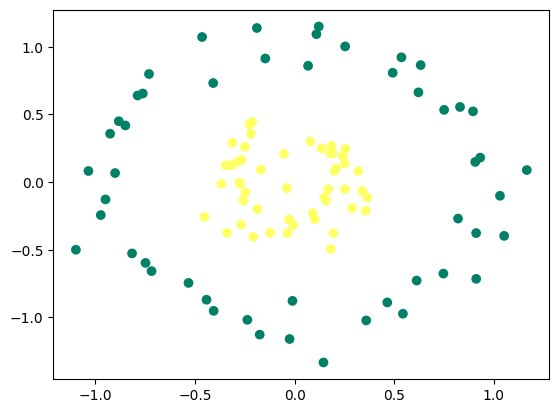

In [20]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)
X = X.T
y = y.reshape((1, y.shape[0]))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[0, :], X[1, :], c=y, cmap='summer')
plt.show()

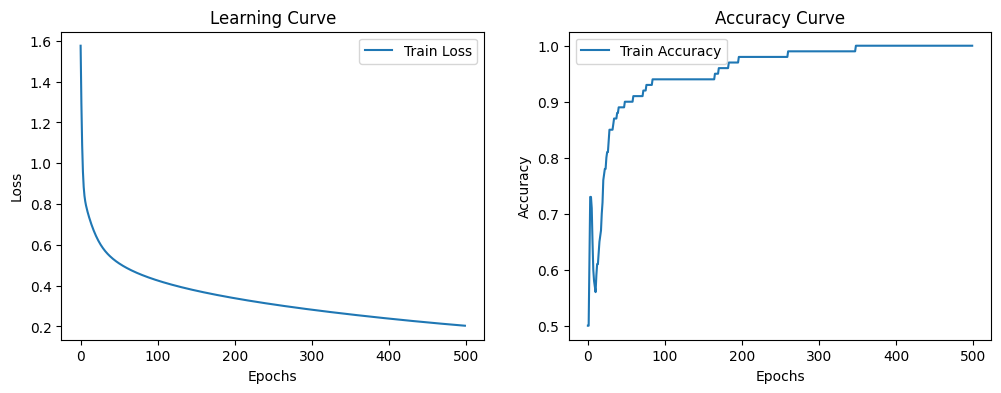

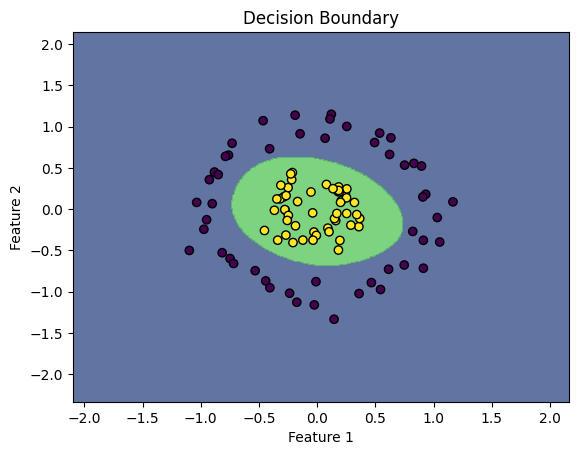

In [21]:
parameters = neural_network(X, y, [2, 64, 64, 1] , learning_rate=0.1, epoch=500)
decision_boundary(X, y, parameters)

Now you understand the power of the neural network.

In [22]:
from tqdm import tqdm

In [23]:
def neural_network2(X_train, y_train, X_test, y_test, dimensions, learning_rate, epoch):

    parameters = initialisation(dimensions)

    train_loss = []
    train_acc = []

    test_loss = []
    test_acc = []

    for i in tqdm(range(epoch)):
        L = len(parameters) // 2

        activations = forward_propagation(X_train, parameters)

        if i % 100 == 0:
            # Train
            # compare the output data: the last activation, to the ground truth y
            train_loss.append(log_loss(y_train.flatten(), activations[f'A{L}'].flatten()))
            train_acc.append(accuracy_score(y_train.flatten(), predict(X_train, parameters).flatten()))
            

            # Test
            activations_test = forward_propagation(X_test, parameters)
            test_loss.append(log_loss(y_test.flatten(), activations_test[f'A{L}'].flatten()))
            test_acc.append(accuracy_score(y_test.flatten(), predict(X_test, parameters).flatten()))
        
        gradients = back_propagation(y_train, parameters, activations)
        parameters = update(gradients, parameters, learning_rate)

    # Ploting the curves
    # - learning curve (loss) and accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Train Loss')
    plt.plot(test_loss, label='Test Loss')
    plt.title('Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Train Accuracy')
    plt.plot(test_acc, label='Test Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    return parameters

In [24]:
from utilities import *

X_train, y_train, X_test, y_test = load_data()

X_train_reshaped = X_train.reshape(64*64, -1) / 255.0
X_test_reshaped = X_test.reshape(64*64, -1) / 255.0


y_train = y_train.T
y_test = y_test.T

print('X_train shape:', X_train_reshaped.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test_reshaped.shape)
print('y_test shape:', y_test.shape)


X_train shape: (4096, 1000)
y_train shape: (1, 1000)
X_test shape: (4096, 200)
y_test shape: (1, 200)


100%|██████████| 5000/5000 [00:37<00:00, 134.17it/s]


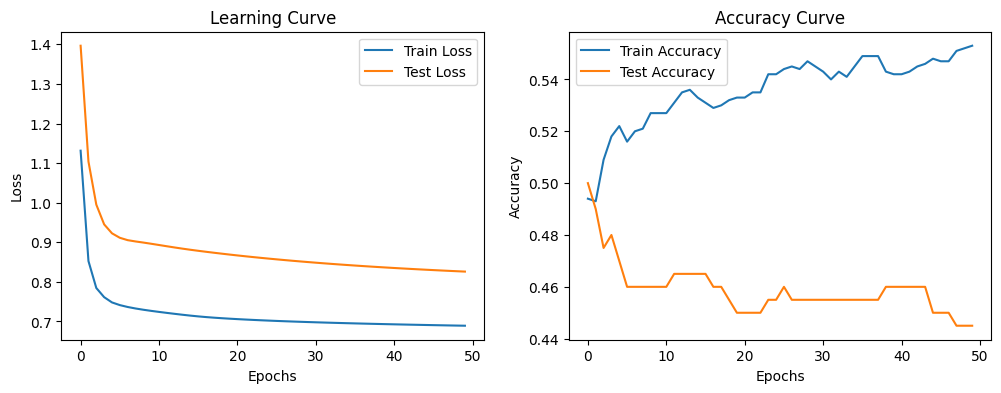

In [27]:
parameters = neural_network2(X_train_reshaped, y_train, X_test_reshaped, y_test, [X_train_reshaped.shape[0], 16, 16, 1], learning_rate=0.01, epoch=5000)
